In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn import preprocessing

# Crime Plots

In [2]:
# Read crime dataset
crime_df = pd.read_csv('crime_check_updated_2023.csv')
display(crime_df)

,week,ROBBERY,BURGLARY,"BURGLARY, ATTEMPTED",BURGLARY FROM VEHICLE,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",SHOPLIFTING-GRAND THEFT ($950.01 & OVER),"THEFT, PERSON",PURSE SNATCHING,...,DRUNK ROLL,"BURGLARY FROM VEHICLE, ATTEMPTED",THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE - ATTEMPT,DRIVING WITHOUT OWNER CONSENT (DWOC),THEFT PLAIN - PETTY ($950 & UNDER),VEHICLE - STOLEN,VEHICLE - ATTEMPT STOLEN,All Crime,location
0,1,5.0,12.0,1.0,12.0,9.0,6.0,0.0,1.0,0.0,...,0.0,0.0,7.0,0.0,0.0,14.0,13.0,0.0,81.0,Walk Of Fame
1,2,10.0,12.0,0.0,18.0,14.0,11.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,15.0,15.0,1.0,107.0,Walk Of Fame
2,3,5.0,13.0,0.0,26.0,11.0,12.0,4.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,19.0,21.0,0.0,124.0,Walk Of Fame
3,4,7.0,23.0,0.0,24.0,16.0,8.0,3.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,13.0,15.0,0.0,118.0,Walk Of Fame
4,5,10.0,12.0,2.0,24.0,17.0,10.0,2.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,19.0,17.0,1.0,122.0,Walk Of Fame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,9,17.0,14.0,4.0,43.0,7.0,25.0,4.0,2.0,0.0,...,0.0,1.0,9.0,0.0,0.0,16.0,41.0,0.0,191.0,DTLA
72,10,26.0,24.0,1.0,38.0,17.0,13.0,4.0,2.0,0.0,...,0.0,0.0,9.0,0.0,0.0,22.0,47.0,2.0,211.0,DTLA
73,11,20.0,22.0,1.0,41.0,13.0,11.0,6.0,2.0,0.0,...,0.0,0.0,9.0,0.0,1.0,18.0,52.0,1.0,204.0,DTLA
74,12,22.0,10.0,0.0,32.0,11.0,17.0,4.0,1.0,0.0,...,0.0,0.0,8.0,1.0,0.0,16.0,42.0,1.0,170.0,DTLA


In [3]:
# Load occupancy data
occupancy = pd.read_csv('occupancy_stats.csv')
display(occupancy)

,week,location,OccupancyState
0,1,Culver City,53578
1,1,DTLA,293920
2,1,Santa Monica,18570
3,1,USC,1130
4,1,Walk Of Fame,75825
5,2,Culver City,52052
6,2,DTLA,329674
7,2,Santa Monica,18726
8,2,USC,1333
9,2,Walk Of Fame,84293


In [4]:
# Find maximum at given locatin
occ_agg = occupancy.groupby(['location']).max()
display(occ_agg)
max_value = occ_agg['OccupancyState'].to_list()
print(max_value)

,week,OccupancyState
location,,
Culver City,9,54882
DTLA,9,339454
Santa Monica,9,19330
USC,9,1333
Walk Of Fame,9,84293


[54882, 339454, 19330, 1333, 84293]


In [5]:
occupancy['OccupancyState_Scaled'] = ""
scaled_list = []

In [6]:
for index, row in occupancy.iterrows():
    if row['location'] == 'Culver City':
        scaled_list.append(row['OccupancyState'] / 54882)
    elif row['location'] == 'DTLA':
        scaled_list.append(row['OccupancyState'] / 339454)
    elif row['location'] == 'Santa Monica':
        scaled_list.append(row['OccupancyState'] / 19330)
    elif row['location'] == 'USC':
        scaled_list.append(row['OccupancyState'] / 1333)
    elif row['location'] == 'Walk Of Fame':
        scaled_list.append(row['OccupancyState'] / 84293)

In [7]:
# scaled_list
occupancy['OccupancyState_Scaled'] = scaled_list

In [10]:
occupancy.to_csv('occupancy_stats_local.csv', index=False, encoding='utf-8')

In [11]:
occupancy = pd.read_csv('occupancy_stats_local.csv')
# display(occupancy)

In [12]:
occupancy_WOF = occupancy[occupancy['location'] == 'Walk Of Fame']
occupancy_WOF = occupancy_WOF[occupancy_WOF['week'] <= 8]

occupancy_USC = occupancy[occupancy['location'] == 'USC']
occupancy_USC = occupancy_USC[occupancy_USC['week'] <= 8]

occupancy_CC = occupancy[occupancy['location'] == 'Culver City']
occupancy_CC = occupancy_CC[occupancy_CC['week'] <= 8]

occupancy_LB = occupancy[occupancy['location'] == 'Long Beach']
occupancy_LB = occupancy_LB[occupancy_LB['week'] <= 8]

occupancy_SM = occupancy[occupancy['location'] == 'Santa Monica']
occupancy_SM = occupancy_SM[occupancy_SM['week'] <= 8]

occupancy_DTLA = occupancy[occupancy['location'] == 'DTLA']
occupancy_DTLA = occupancy_DTLA[occupancy_DTLA['week'] <= 8]

In [13]:
occpancy_compare = {'Walk of Fame': list(occupancy_WOF['OccupancyState_Scaled']), 
                    'USC': list(occupancy_USC['OccupancyState_Scaled']), 
                    'Culver City': list(occupancy_CC['OccupancyState_Scaled']), 
                    'Long Beach': list(occupancy_LB['OccupancyState_Scaled']), 
                    'Santa Monica': list(occupancy_SM['OccupancyState_Scaled']), 
                    'DTLA': list(occupancy_DTLA['OccupancyState_Scaled'])
                   }
occ_Week_list = list(['Week '+str(i) for i in range(1, 9)])

## Location Comparison

In [14]:
crime_WOF = crime_df[crime_df['location'] == 'Walk Of Fame']
crime_WOF = crime_WOF[crime_WOF['week'] <= 8]

crime_USC = crime_df[crime_df['location'] == 'USC']
crime_USC = crime_USC[crime_USC['week'] <= 8]

crime_CC = crime_df[crime_df['location'] == 'Culver City']
crime_CC = crime_CC[crime_CC['week'] <= 8]

crime_LB = crime_df[crime_df['location'] == 'Long Beach']
crime_LB = crime_LB[crime_LB['week'] <= 8]

crime_SM = crime_df[crime_df['location'] == 'Santa Monica']
crime_SM = crime_SM[crime_SM['week'] <= 8]

crime_DTLA = crime_df[crime_df['location'] == 'DTLA']
crime_DTLA = crime_DTLA[crime_DTLA['week'] <= 8]

In [15]:
location_compare = {'Walk of Fame': list(crime_WOF['All Crime']), 'USC': list(crime_USC['All Crime']), 
                    'Culver City': list(crime_CC['All Crime']), 'Long Beach': list(crime_LB['All Crime']), 
                    'Santa Monica': list(crime_SM['All Crime']), 'DTLA': list(crime_DTLA['All Crime'])
                   }
print(location_compare)
Week_list = list(['Week '+str(i) for i in range(1, 13)])

{'Walk of Fame': [81.0, 107.0, 124.0, 118.0, 122.0, 134.0, 98.0, 106.0], 'USC': [143.0, 181.0, 146.0, 155.0, 143.0, 170.0, 163.0, 157.0], 'Culver City': [37.0, 38.0, 38.0, 49.0, 52.0, 53.0, 57.0, 53.0], 'Long Beach': [70.0, 62.0, 60.0, 77.0, 66.0, 62.0, 68.0, 81.0], 'Santa Monica': [13.0, 4.0, 11.0, 4.0, 7.0, 4.0, 4.0, 6.0], 'DTLA': [270.0, 293.0, 267.0, 253.0, 242.0, 265.0, 228.0, 237.0]}


C:\Users\cheny\AppData\Local\Temp\ipykernel_5248\4285467763.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo--" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(occ_Week_list, occpancy_compare['Culver City'], 'bo--', linewidth=2.0, color='g', label='Culver City')


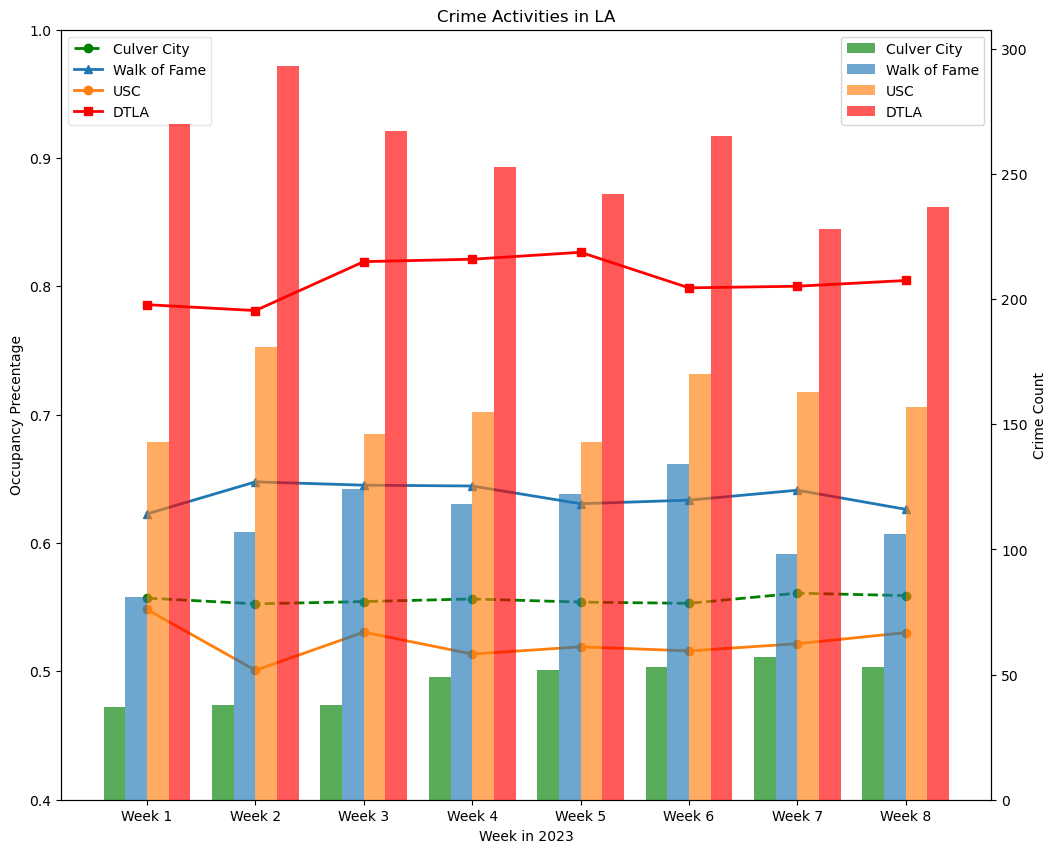

In [16]:
X_axis = np.arange(len(occ_Week_list))
# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(12, 10))

# plot line chart on axis #1
ax1.plot(occ_Week_list, occpancy_compare['Culver City'], 'bo--', linewidth=2.0, color='g', label='Culver City') 
ax1.plot(occ_Week_list, occpancy_compare['Walk of Fame'], '^-', linewidth=2.0, label='Walk of Fame')
ax1.plot(occ_Week_list, occpancy_compare['USC'], '-o', linewidth=2.0, label='USC') 
ax1.plot(occ_Week_list, occpancy_compare['DTLA'], '-s', linewidth=2.0, color='r', label='DTLA') 
ax1.set_ylabel('Occupancy Precentage')
ax1.set_xlabel('Week in 2023')
ax1.set_title("Crime Activities in LA")
ax1.set_ylim(0.4, 1.0)
ax1.legend(fancybox=True, framealpha=0.5, loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
plt.bar(X_axis - 0.3, location_compare['Culver City'], 0.2, alpha=0.65, color='g')
plt.bar(X_axis - 0.1, location_compare['Walk of Fame'], 0.2, alpha=0.65)
plt.bar(X_axis + 0.1, location_compare['USC'], 0.2, alpha=0.65)
plt.bar(X_axis + 0.3, location_compare['DTLA'], 0.2, alpha=0.65, color='r')

ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Crime Count')
# ax2.set_ylim(0, 90)
ax2.legend(['Culver City', 'Walk of Fame', 'USC', 'DTLA'], loc="upper right")

plt.show()

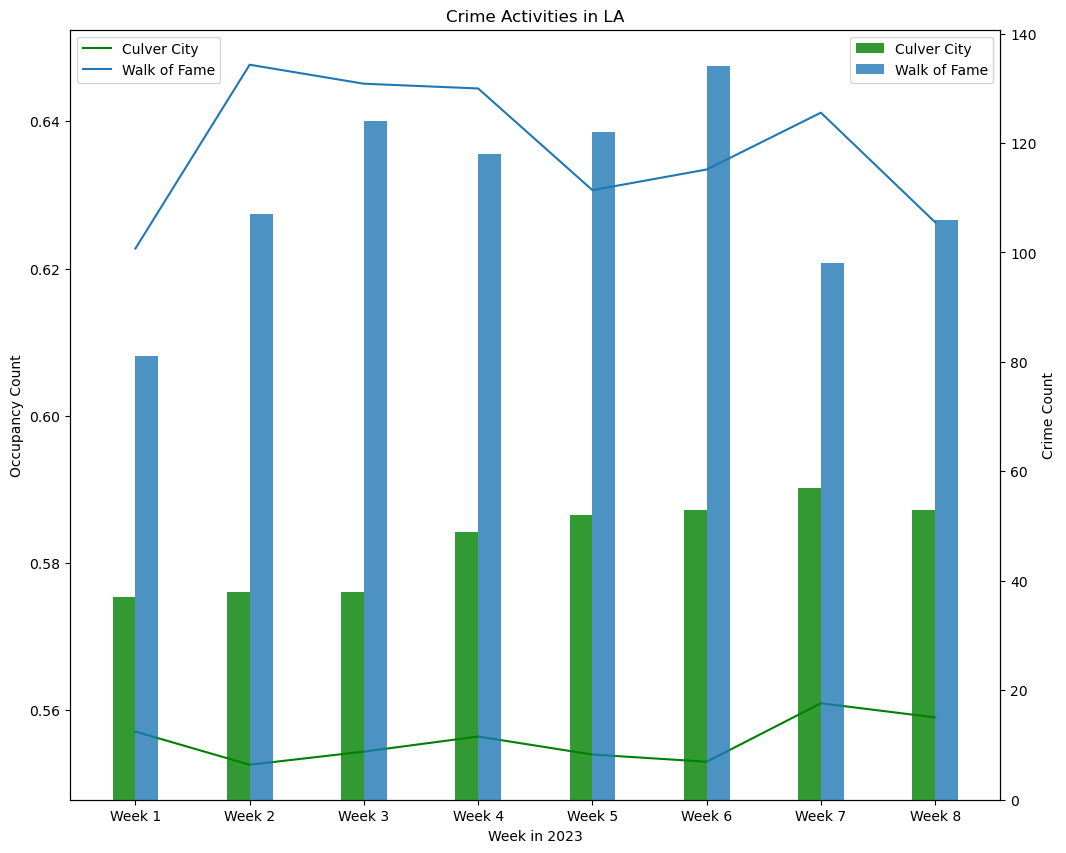

In [17]:
X_axis = np.arange(len(occ_Week_list))
# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(12, 10))

# plot line chart on axis #1
ax1.plot(occ_Week_list, occpancy_compare['Culver City'], color='g') 
ax1.plot(occ_Week_list, occpancy_compare['Walk of Fame'])
# ax1.plot(occ_Week_list, occpancy_compare['USC']) 
# ax1.plot(occ_Week_list, occpancy_compare['DTLA'], color = 'r') 
ax1.set_ylabel('Occupancy Count')
ax1.set_xlabel('Week in 2023')
ax1.set_title("Crime Activities in LA")
# ax1.set_ylim(0, 25)
ax1.legend(['Culver City', 'Walk of Fame'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
plt.bar(X_axis - 0.1, location_compare['Culver City'], 0.2, alpha=0.8, color='g')
plt.bar(X_axis + 0.1, location_compare['Walk of Fame'], 0.2, alpha=0.8)
# plt.bar(X_axis + 0.1, location_compare['USC'], 0.2, alpha=0.7)
# plt.bar(X_axis + 0.3, location_compare['DTLA'], 0.2, alpha=0.7, color='r')

ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Crime Count')
# ax2.set_ylim(0, 90)
ax2.legend(['Culver City', 'Walk of Fame'], loc="upper right")
plt.xlabel("Week of 2023")

plt.show()

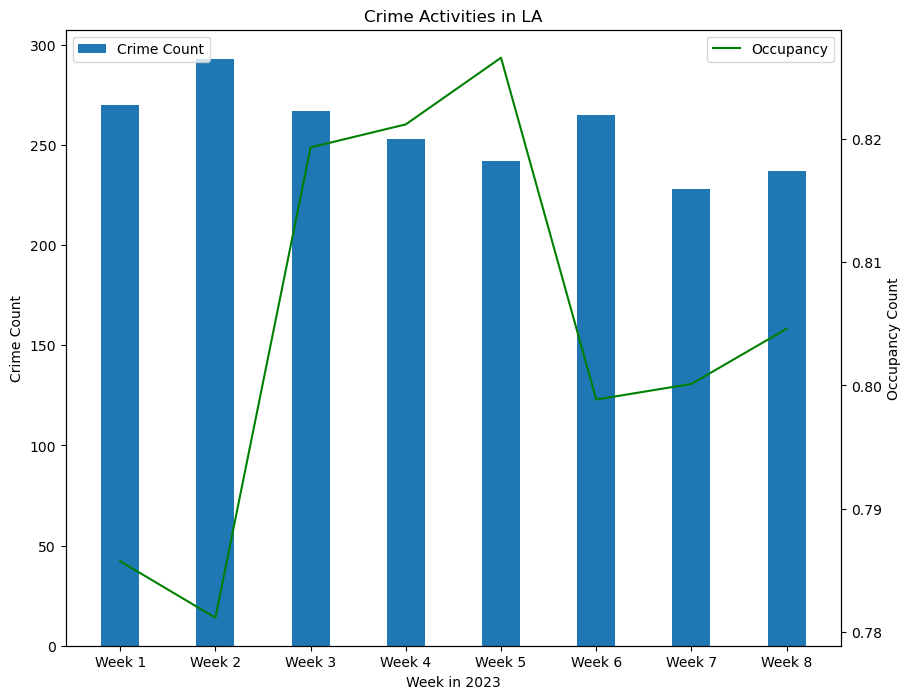

In [18]:
X_axis = np.arange(len(occ_Week_list))

# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(10, 8))

# plot bar chart on axis #1

# plt.bar(X_axis - 0.1, location_compare['Culver City'], 0.2, alpha=0.8, color='g')
# plt.bar(X_axis + 0.1, location_compare['Walk of Fame'], 0.2, alpha=0.8)
# plt.bar(X_axis + 0.1, location_compare['USC'], 0.2, alpha=0.7)
plt.bar(X_axis, location_compare['DTLA'], 0.4)
ax1.set_ylabel('Crime Count')
ax1.set_xlabel('Week in 2023')
ax1.set_title("Crime Activities in LA")
# ax1.set_ylim(0, 25)
ax1.legend(['Crime Count'], loc="upper left")

# set up the 2nd axis
# plot line chart on axis #2
ax2 = ax1.twinx()
# ax2.plot(occ_Week_list, occpancy_compare['Culver City'], color='g') 
# ax2.plot(occ_Week_list, occpancy_compare['Walk of Fame'])
# ax2.plot(occ_Week_list, occpancy_compare['USC']) 
ax2.plot(occ_Week_list, occpancy_compare['DTLA'], color = 'g') 

ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Occupancy Count')
# ax2.set_ylim(0, 90)
ax2.legend(['Occupancy'], loc="upper right")
plt.xlabel("Week of 2023")

plt.show()

In [19]:
crime_WOF = crime_df[crime_df['location'] == 'Walk Of Fame']
crime_WOF = crime_WOF[crime_WOF['week'] <= 12]

crime_USC = crime_df[crime_df['location'] == 'USC']
crime_USC = crime_USC[crime_USC['week'] <= 12]

crime_CC = crime_df[crime_df['location'] == 'Culver City']
crime_CC = crime_CC[crime_CC['week'] <= 12]

crime_LB = crime_df[crime_df['location'] == 'Long Beach']
crime_LB = crime_LB[crime_LB['week'] <= 12]

crime_SM = crime_df[crime_df['location'] == 'Santa Monica']
crime_SM = crime_SM[crime_SM['week'] <= 12]

crime_DTLA = crime_df[crime_df['location'] == 'DTLA']
crime_DTLA = crime_DTLA[crime_DTLA['week'] <= 12]

In [20]:
location_compare = {'Walk of Fame': list(crime_WOF['All Crime']), 'USC': list(crime_USC['All Crime']), 
                    'Culver City': list(crime_CC['All Crime']), 'Long Beach': list(crime_LB['All Crime']), 
                    'Santa Monica': list(crime_SM['All Crime']), 'DTLA': list(crime_DTLA['All Crime'])
                   }
print(location_compare)
Week_list = list(['Week '+str(i) for i in range(1, 13)])

{'Walk of Fame': [81.0, 107.0, 124.0, 118.0, 122.0, 134.0, 98.0, 106.0, 119.0, 106.0, 76.0, 55.0], 'USC': [143.0, 181.0, 146.0, 155.0, 143.0, 170.0, 163.0, 157.0, 150.0, 167.0, 149.0, 120.0], 'Culver City': [37.0, 38.0, 38.0, 49.0, 52.0, 53.0, 57.0, 53.0, 40.0, 52.0, 34.0, 34.0], 'Long Beach': [70.0, 62.0, 60.0, 77.0, 66.0, 62.0, 68.0, 81.0, 74.0, 66.0, 70.0, 53.0], 'Santa Monica': [13.0, 4.0, 11.0, 4.0, 7.0, 4.0, 4.0, 6.0, 3.0, 4.0, 5.0, 1.0], 'DTLA': [270.0, 293.0, 267.0, 253.0, 242.0, 265.0, 228.0, 237.0, 191.0, 211.0, 204.0, 170.0]}


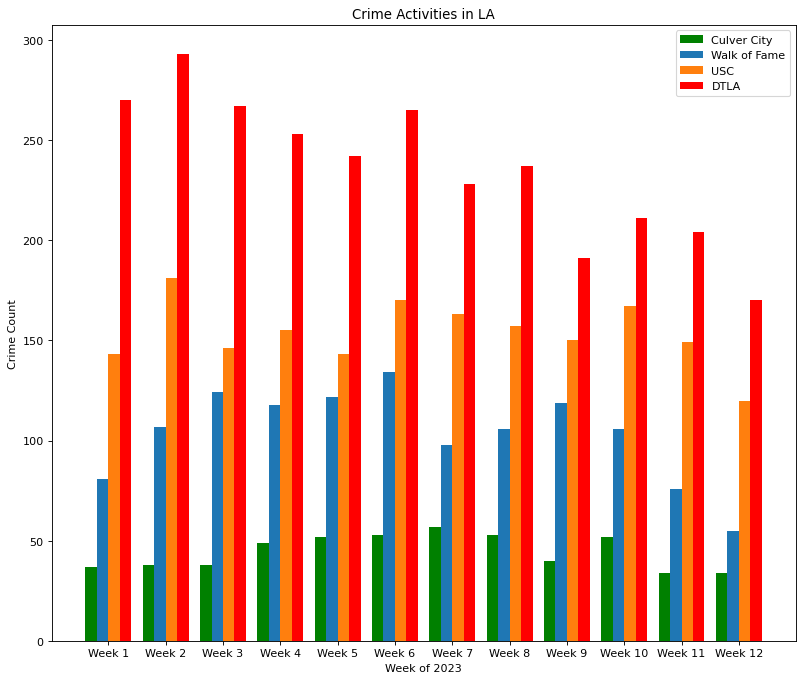

In [21]:
plt.figure(figsize=(12, 10), dpi=80)

X_axis = np.arange(len(Week_list))

plt.bar(X_axis - 0.3, location_compare['Culver City'], 0.2, label = 'Culver City', color='g')
plt.bar(X_axis - 0.1, location_compare['Walk of Fame'], 0.2, label = 'Walk of Fame')
plt.bar(X_axis + 0.1, location_compare['USC'], 0.2, label = 'USC')
plt.bar(X_axis + 0.3, location_compare['DTLA'], 0.2, label = 'DTLA', color='r')
# plt.bar(X_axis + 0.2, location_compare['Long Beach'], 0.2, label = 'Long Beach')
# plt.bar(X_axis + 0.4, location_compare['Santa Monica'], 0.2, label = 'Santa Monica')

plt.xticks(X_axis, Week_list)
plt.xlabel("Week of 2023")
plt.ylabel("Crime Count")
plt.title("Crime Activities in LA")
plt.legend()
plt.show()

## Walk of Fame

In [22]:
# Chart for WOF
crime_WOF = crime_df[crime_df['location'] == 'Walk Of Fame']
crime_WOF = crime_WOF[crime_WOF['week'] <= 12]
crime_WOF.drop(['All Crime', 'location'], 
               axis=1, inplace=True)
# crime_WOF.drop(['All Crime', 'location', 'PURSE SNATCHING', 'DRUNK ROLL', 'BURGLARY FROM VEHICLE, ATTEMPTED',
#                 'THEFT FROM MOTOR VEHICLE - ATTEMPT'], 
#                axis=1, inplace=True)
# Drop columns with all 0.0
crime_WOF = crime_WOF.loc[:, (crime_WOF != 0.0).any(axis=0)]
display(crime_WOF)

,week,ROBBERY,BURGLARY,"BURGLARY, ATTEMPTED",BURGLARY FROM VEHICLE,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",SHOPLIFTING-GRAND THEFT ($950.01 & OVER),"THEFT, PERSON",PICKPOCKET,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),DRIVING WITHOUT OWNER CONSENT (DWOC),THEFT PLAIN - PETTY ($950 & UNDER),VEHICLE - STOLEN,VEHICLE - ATTEMPT STOLEN
0,1,5.0,12.0,1.0,12.0,9.0,6.0,0.0,1.0,1.0,7.0,0.0,14.0,13.0,0.0
1,2,10.0,12.0,0.0,18.0,14.0,11.0,0.0,0.0,3.0,8.0,0.0,15.0,15.0,1.0
2,3,5.0,13.0,0.0,26.0,11.0,12.0,4.0,0.0,7.0,6.0,0.0,19.0,21.0,0.0
3,4,7.0,23.0,0.0,24.0,16.0,8.0,3.0,1.0,5.0,3.0,0.0,13.0,15.0,0.0
4,5,10.0,12.0,2.0,24.0,17.0,10.0,2.0,1.0,3.0,4.0,0.0,19.0,17.0,1.0
5,6,6.0,22.0,1.0,30.0,13.0,9.0,4.0,2.0,7.0,4.0,0.0,12.0,24.0,0.0
6,7,2.0,10.0,0.0,13.0,15.0,11.0,3.0,1.0,0.0,12.0,0.0,13.0,18.0,0.0
7,8,5.0,16.0,2.0,15.0,16.0,12.0,3.0,0.0,0.0,4.0,1.0,16.0,15.0,1.0
8,9,8.0,17.0,0.0,23.0,8.0,14.0,1.0,1.0,5.0,6.0,0.0,14.0,21.0,1.0
9,10,7.0,22.0,0.0,18.0,12.0,6.0,0.0,2.0,5.0,7.0,0.0,9.0,18.0,0.0


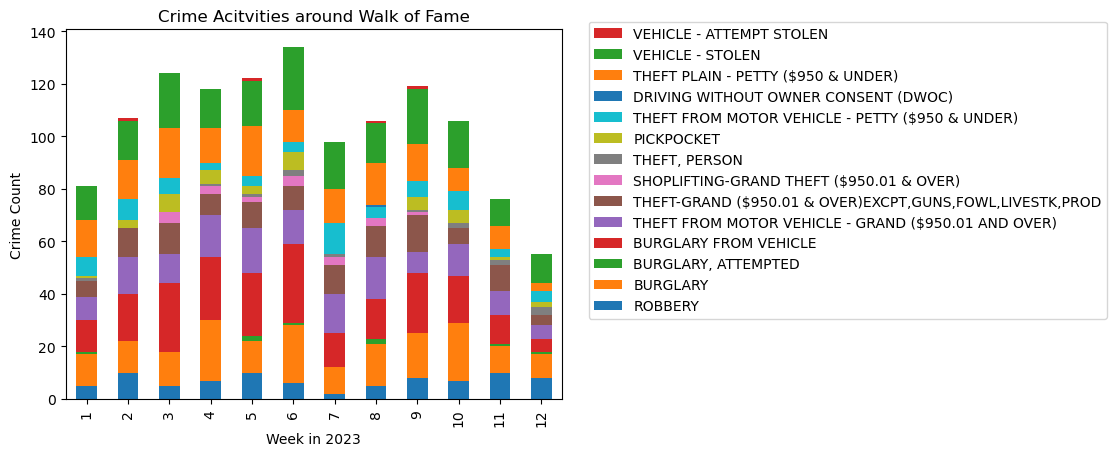

In [23]:
ax = crime_WOF.plot(x='week', kind='bar', stacked=True, title='Crime Acitvities around Walk of Fame')
plt.xlabel("Week in 2023")
plt.ylabel("Crime Count")
handles, labels = ax.get_legend_handles_labels()

# Reverse Legend order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1.04))
# plt.legend(bbox_to_anchor=(1.04, 1.04))

plt.show()

In [24]:
# Get top 10 crime columns
s = crime_WOF.sum().sort_values(ascending=False, inplace=False)[:5]
# print(len(s.index))
# Reorder the df
crime_WOF_reorder = crime_WOF.loc[:, s.index]
crime_WOF_reorder = crime_WOF_reorder.join(crime_WOF['week'])
display(crime_WOF_reorder)

,BURGLARY FROM VEHICLE,VEHICLE - STOLEN,BURGLARY,THEFT PLAIN - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),week
0,12.0,13.0,12.0,14.0,9.0,1
1,18.0,15.0,12.0,15.0,14.0,2
2,26.0,21.0,13.0,19.0,11.0,3
3,24.0,15.0,23.0,13.0,16.0,4
4,24.0,17.0,12.0,19.0,17.0,5
5,30.0,24.0,22.0,12.0,13.0,6
6,13.0,18.0,10.0,13.0,15.0,7
7,15.0,15.0,16.0,16.0,16.0,8
8,23.0,21.0,17.0,14.0,8.0,9
9,18.0,18.0,22.0,9.0,12.0,10


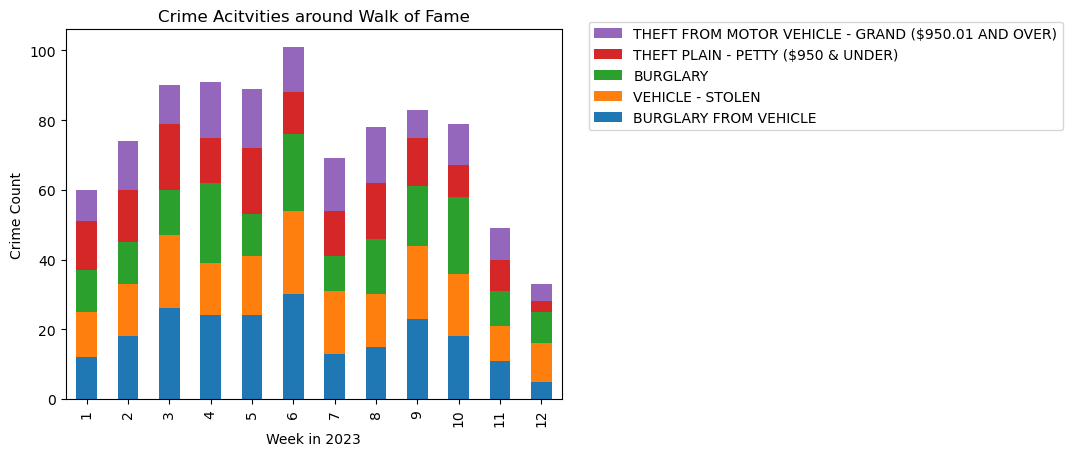

In [25]:
ax = crime_WOF_reorder.plot(x='week', kind='bar', stacked=True, title='Crime Acitvities around Walk of Fame')
plt.xlabel("Week in 2023")
plt.ylabel("Crime Count")
handles, labels = ax.get_legend_handles_labels()
# Reverse Legend order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1.04))
# plt.legend(bbox_to_anchor=(1.04, 1.04))
plt.show()

## USC

In [26]:
# Chart for USC
crime_USC = crime_df[crime_df['location'] == 'USC']
crime_USC = crime_USC[crime_USC['week'] <= 12]
crime_USC.drop(['All Crime', 'location'], axis=1, inplace=True)
# crime_USC.drop(['PURSE SNATCHING', 'DRUNK ROLL', 'BURGLARY FROM VEHICLE, ATTEMPTED','THEFT FROM MOTOR VEHICLE - ATTEMPT'], 
#                 axis=1, inplace=True)
# Drop columns with all 0.0
crime_USC = crime_USC.loc[:, (crime_USC != 0.0).any(axis=0)]
display(crime_USC)

,week,ROBBERY,BURGLARY,"BURGLARY, ATTEMPTED",BURGLARY FROM VEHICLE,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",SHOPLIFTING-GRAND THEFT ($950.01 & OVER),"THEFT, PERSON",PURSE SNATCHING,PICKPOCKET,"BURGLARY FROM VEHICLE, ATTEMPTED",THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE - ATTEMPT,THEFT PLAIN - PETTY ($950 & UNDER),VEHICLE - STOLEN,VEHICLE - ATTEMPT STOLEN
13,1,17.0,12.0,0.0,25.0,13.0,9.0,1.0,1.0,0.0,0.0,2.0,10.0,0.0,12.0,40.0,1.0
14,2,15.0,16.0,2.0,18.0,25.0,18.0,0.0,1.0,0.0,4.0,0.0,8.0,1.0,18.0,54.0,1.0
15,3,10.0,11.0,1.0,16.0,16.0,13.0,4.0,2.0,0.0,5.0,1.0,13.0,0.0,17.0,37.0,0.0
16,4,12.0,22.0,1.0,16.0,13.0,10.0,1.0,0.0,0.0,2.0,2.0,11.0,2.0,24.0,39.0,0.0
17,5,9.0,14.0,2.0,20.0,14.0,8.0,4.0,4.0,0.0,2.0,0.0,9.0,0.0,14.0,42.0,1.0
18,6,13.0,15.0,1.0,32.0,10.0,16.0,2.0,0.0,0.0,2.0,0.0,7.0,0.0,19.0,51.0,2.0
19,7,11.0,15.0,2.0,19.0,9.0,17.0,3.0,2.0,1.0,3.0,1.0,10.0,1.0,20.0,48.0,1.0
20,8,11.0,15.0,4.0,15.0,17.0,11.0,3.0,2.0,0.0,13.0,1.0,12.0,2.0,19.0,29.0,3.0
21,9,8.0,16.0,1.0,13.0,15.0,16.0,2.0,3.0,0.0,1.0,0.0,13.0,2.0,20.0,39.0,1.0
22,10,17.0,9.0,0.0,13.0,16.0,16.0,3.0,0.0,0.0,19.0,1.0,10.0,0.0,13.0,47.0,3.0


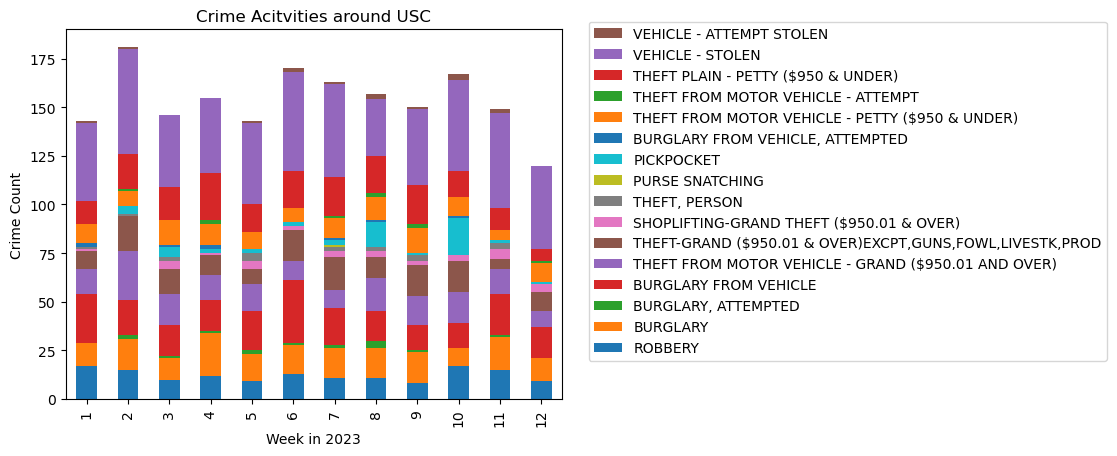

In [27]:
ax = crime_USC.plot(x='week', kind='bar', stacked=True, title='Crime Acitvities around USC')
plt.xlabel("Week in 2023")
plt.ylabel("Crime Count")
handles, labels = ax.get_legend_handles_labels()
# Reverse Legend order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1.04))
# plt.legend(bbox_to_anchor=(1.04, 1.04))
plt.show()

In [28]:
# Get top 10 crime columns
s = crime_USC.sum().sort_values(ascending=False, inplace=False)[:5]
# print(len(s.index))
# Reorder the df
crime_USC_reorder = crime_USC.loc[:, s.index]
crime_USC_reorder = crime_USC_reorder.join(crime_USC['week'])
display(crime_USC_reorder)

,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,THEFT PLAIN - PETTY ($950 & UNDER),BURGLARY,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),week
13,40.0,25.0,12.0,12.0,13.0,1
14,54.0,18.0,18.0,16.0,25.0,2
15,37.0,16.0,17.0,11.0,16.0,3
16,39.0,16.0,24.0,22.0,13.0,4
17,42.0,20.0,14.0,14.0,14.0,5
18,51.0,32.0,19.0,15.0,10.0,6
19,48.0,19.0,20.0,15.0,9.0,7
20,29.0,15.0,19.0,15.0,17.0,8
21,39.0,13.0,20.0,16.0,15.0,9
22,47.0,13.0,13.0,9.0,16.0,10


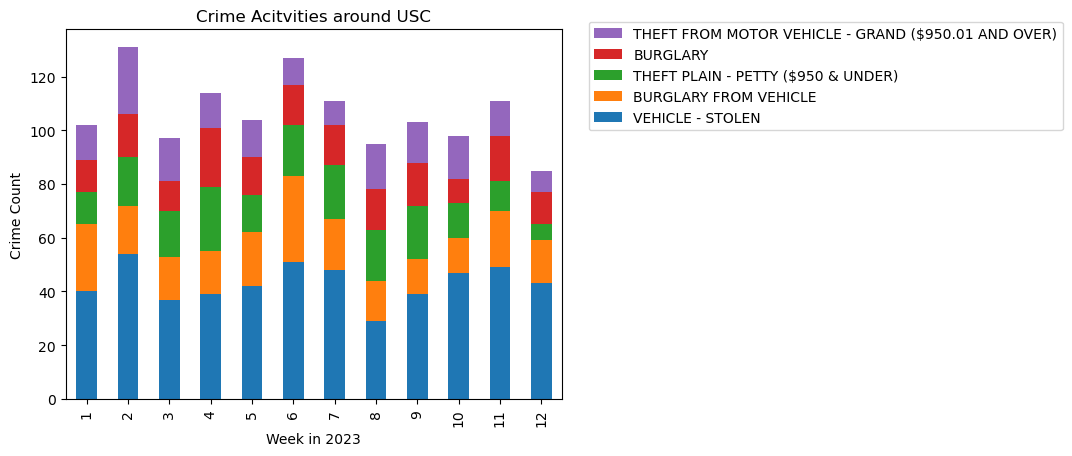

In [29]:
ax = crime_USC_reorder.plot(x='week', kind='bar', stacked=True, title='Crime Acitvities around USC')
plt.xlabel("Week in 2023")
plt.ylabel("Crime Count")
handles, labels = ax.get_legend_handles_labels()
# Reverse Legend order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1.04))
# plt.legend(bbox_to_anchor=(1.04, 1.04))
plt.show()

## DTLA

In [30]:
# Chart for DTLA
crime_DTLA = crime_df[crime_df['location'] == 'DTLA']
crime_DTLA = crime_DTLA[crime_DTLA['week'] <= 12]
crime_DTLA.drop(['All Crime', 'location'], axis=1, inplace=True)
# crime_DTLA.drop(['PURSE SNATCHING', 'DRUNK ROLL', 'BURGLARY FROM VEHICLE, ATTEMPTED','THEFT FROM MOTOR VEHICLE - ATTEMPT'], 
#                 axis=1, inplace=True)
# Drop columns with all 0.0
crime_DTLA = crime_DTLA.loc[:, (crime_DTLA != 0.0).any(axis=0)]
display(crime_DTLA)

,week,ROBBERY,BURGLARY,"BURGLARY, ATTEMPTED",BURGLARY FROM VEHICLE,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",SHOPLIFTING-GRAND THEFT ($950.01 & OVER),"THEFT, PERSON",PURSE SNATCHING,PICKPOCKET,"BURGLARY FROM VEHICLE, ATTEMPTED",THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE - ATTEMPT,DRIVING WITHOUT OWNER CONSENT (DWOC),THEFT PLAIN - PETTY ($950 & UNDER),VEHICLE - STOLEN,VEHICLE - ATTEMPT STOLEN
63,1,18.0,25.0,2.0,87.0,41.0,11.0,1.0,2.0,0.0,6.0,0.0,9.0,0.0,0.0,30.0,37.0,1.0
64,2,23.0,21.0,1.0,82.0,41.0,31.0,2.0,5.0,0.0,4.0,0.0,9.0,0.0,0.0,24.0,48.0,2.0
65,3,16.0,18.0,1.0,79.0,25.0,20.0,4.0,5.0,0.0,18.0,0.0,12.0,0.0,0.0,25.0,43.0,1.0
66,4,20.0,32.0,2.0,73.0,30.0,15.0,4.0,1.0,1.0,9.0,1.0,12.0,0.0,0.0,20.0,33.0,0.0
67,5,13.0,17.0,3.0,63.0,23.0,24.0,3.0,5.0,0.0,9.0,0.0,14.0,0.0,0.0,27.0,41.0,0.0
68,6,25.0,20.0,2.0,85.0,14.0,19.0,1.0,4.0,0.0,10.0,0.0,9.0,0.0,0.0,32.0,41.0,3.0
69,7,15.0,16.0,0.0,70.0,18.0,18.0,1.0,4.0,0.0,9.0,0.0,10.0,1.0,0.0,18.0,47.0,1.0
70,8,19.0,32.0,1.0,57.0,19.0,16.0,3.0,4.0,0.0,2.0,1.0,15.0,1.0,0.0,24.0,41.0,2.0
71,9,17.0,14.0,4.0,43.0,7.0,25.0,4.0,2.0,0.0,8.0,1.0,9.0,0.0,0.0,16.0,41.0,0.0
72,10,26.0,24.0,1.0,38.0,17.0,13.0,4.0,2.0,0.0,6.0,0.0,9.0,0.0,0.0,22.0,47.0,2.0


In [31]:
# Get top 10 crime columns
s = crime_DTLA.sum().sort_values(ascending=False, inplace=False)[:10]
# print(len(s.index))
# Reorder the df
crime_DTLA_reorder = crime_DTLA.loc[:, s.index]
# crime_DTLA_reorder = crime_DTLA_reorder.join(crime_DTLA['week'])
display(crime_DTLA_reorder)

,BURGLARY FROM VEHICLE,VEHICLE - STOLEN,THEFT PLAIN - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),BURGLARY,ROBBERY,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),PICKPOCKET,week
63,87.0,37.0,30.0,41.0,25.0,18.0,11.0,9.0,6.0,1
64,82.0,48.0,24.0,41.0,21.0,23.0,31.0,9.0,4.0,2
65,79.0,43.0,25.0,25.0,18.0,16.0,20.0,12.0,18.0,3
66,73.0,33.0,20.0,30.0,32.0,20.0,15.0,12.0,9.0,4
67,63.0,41.0,27.0,23.0,17.0,13.0,24.0,14.0,9.0,5
68,85.0,41.0,32.0,14.0,20.0,25.0,19.0,9.0,10.0,6
69,70.0,47.0,18.0,18.0,16.0,15.0,18.0,10.0,9.0,7
70,57.0,41.0,24.0,19.0,32.0,19.0,16.0,15.0,2.0,8
71,43.0,41.0,16.0,7.0,14.0,17.0,25.0,9.0,8.0,9
72,38.0,47.0,22.0,17.0,24.0,26.0,13.0,9.0,6.0,10


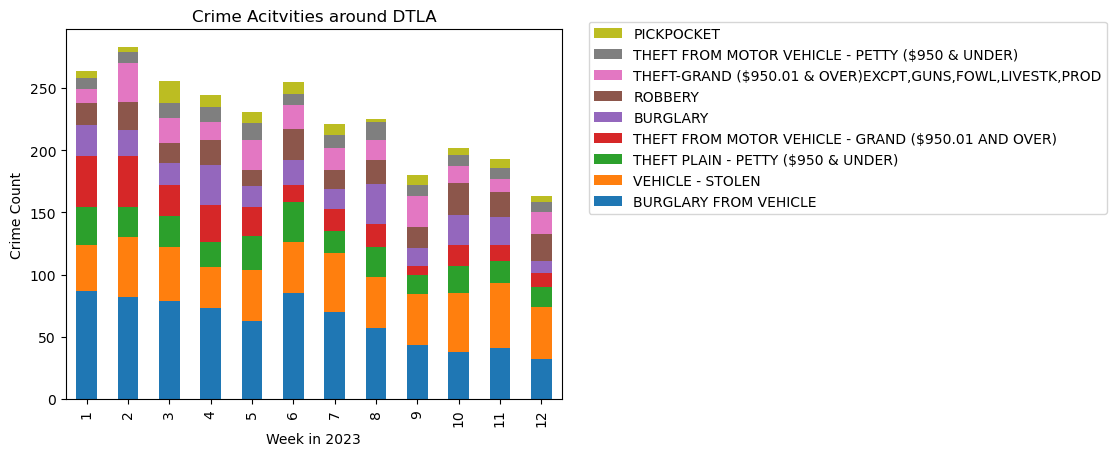

In [32]:
ax = crime_DTLA_reorder.plot(x='week', kind='bar', stacked=True, title='Crime Acitvities around DTLA')
plt.xlabel("Week in 2023")
plt.ylabel("Crime Count")
handles, labels = ax.get_legend_handles_labels()
# Reverse Legend order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1.04))
# plt.legend(bbox_to_anchor=(1.04, 1.04))
plt.show()

In [33]:
# Take closer look at week 2
crime_DTLA_week2 = crime_DTLA[crime_DTLA['week']==2]
# Drop column week
crime_DTLA_week2.drop(['week'], axis=1, inplace=True)
display(crime_DTLA_week2)

C:\Users\cheny\AppData\Local\Temp\ipykernel_5248\1211622323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_DTLA_week2.drop(['week'], axis=1, inplace=True)


,ROBBERY,BURGLARY,"BURGLARY, ATTEMPTED",BURGLARY FROM VEHICLE,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",SHOPLIFTING-GRAND THEFT ($950.01 & OVER),"THEFT, PERSON",PURSE SNATCHING,PICKPOCKET,"BURGLARY FROM VEHICLE, ATTEMPTED",THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE - ATTEMPT,DRIVING WITHOUT OWNER CONSENT (DWOC),THEFT PLAIN - PETTY ($950 & UNDER),VEHICLE - STOLEN,VEHICLE - ATTEMPT STOLEN
64,23.0,21.0,1.0,82.0,41.0,31.0,2.0,5.0,0.0,4.0,0.0,9.0,0.0,0.0,24.0,48.0,2.0


In [34]:
# Tranform into dictionary
crime_DTLA_dict = crime_DTLA_week2.to_dict('list')
# Sort based on values
crime_DTLA = sorted(crime_DTLA_dict.items(), key=lambda x: x[1], reverse=True)
print(crime_DTLA)

[('BURGLARY FROM VEHICLE', [82.0]), ('VEHICLE - STOLEN', [48.0]), ('THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', [41.0]), ('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', [31.0]), ('THEFT PLAIN - PETTY ($950 & UNDER)', [24.0]), ('ROBBERY', [23.0]), ('BURGLARY', [21.0]), ('THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', [9.0]), ('THEFT, PERSON', [5.0]), ('PICKPOCKET', [4.0]), ('SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', [2.0]), ('VEHICLE - ATTEMPT STOLEN', [2.0]), ('BURGLARY, ATTEMPTED', [1.0]), ('PURSE SNATCHING', [0.0]), ('BURGLARY FROM VEHICLE, ATTEMPTED', [0.0]), ('THEFT FROM MOTOR VEHICLE - ATTEMPT', [0.0]), ('DRIVING WITHOUT OWNER CONSENT (DWOC)', [0.0])]


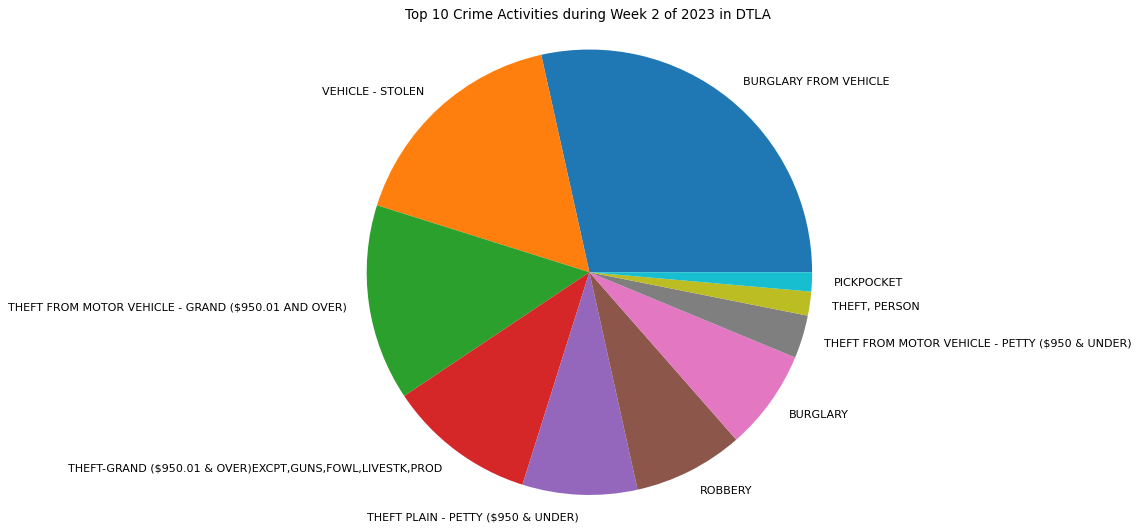

In [35]:
labels = list()
count = list()
for item in crime_DTLA:
    labels.append(item[0])
    count.append(item[1])

# Plot top 10
labels = labels[:10]
count = count[:10]
# Flatten the list
count = [item for sublist in count for item in sublist]

# Plot
plt.figure(figsize=(10, 8), dpi=80)
plt.pie(count, labels=labels)
plt.title('Top 10 Crime Activities during Week 2 of 2023 in DTLA')
plt.axis('equal')
plt.show()

# Citation Plots

In [36]:
# Read citation dataset
citation_df = pd.read_csv('citation_check_updated_2023.csv')
display(citation_df)

,week,PARKING PROHIBITED OR LIMITED,PARKED IN BUS LOADING ZONE,PUBLIC GROUNDS,BICYCLE PARKING,BLK BIKE PATH OR LANE,PARKED IN FIRE LANE,WITHIN INTERSECTION,PARKED IN CROSSWALK,SAFETY ZONE/CURB,...,FOR SALE SIGN,OUTSIDE LINES/METER,METER EXP.,OFF STR MTR/OUT LINE,OFF STR/OVERTIME/MTR,TIME LIMIT/CITY LOT,ELECTRIC CHARGING STATION SPACES,METER EXPIRED,All Violation,location
0,1,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,1.0,307.0,0.0,0.0,0.0,7.0,0.0,1762.0,Walk Of Fame
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,287.0,0.0,0.0,0.0,3.0,0.0,1354.0,Walk Of Fame
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,288.0,0.0,0.0,0.0,1.0,0.0,2042.0,Walk Of Fame
3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2.0,401.0,0.0,0.0,0.0,0.0,0.0,2307.0,Walk Of Fame
4,5,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,1.0,...,0.0,2.0,365.0,0.0,0.0,0.0,0.0,0.0,1929.0,Walk Of Fame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,9,0.0,0.0,0.0,0.0,15.0,5.0,2.0,20.0,3.0,...,0.0,35.0,1291.0,0.0,13.0,0.0,38.0,0.0,4970.0,DTLA
74,10,0.0,0.0,0.0,0.0,7.0,1.0,3.0,15.0,2.0,...,0.0,44.0,1246.0,0.0,10.0,0.0,38.0,0.0,5007.0,DTLA
75,11,0.0,0.0,0.0,0.0,12.0,0.0,1.0,8.0,2.0,...,0.0,40.0,1060.0,1.0,12.0,0.0,29.0,0.0,4334.0,DTLA
76,12,0.0,0.0,0.0,0.0,8.0,1.0,0.0,8.0,5.0,...,0.0,34.0,957.0,1.0,8.0,0.0,36.0,0.0,4020.0,DTLA


## Location Comparison

In [37]:
citation_WOF = citation_df[citation_df['location'] == 'Walk Of Fame']
citation_WOF = citation_WOF[citation_WOF['week'] <= 12]

citation_USC = citation_df[citation_df['location'] == 'USC']
citation_USC = citation_USC[citation_USC['week'] <= 12]

citation_CC = citation_df[citation_df['location'] == 'Culver City']
citation_CC = citation_CC[citation_CC['week'] <= 12]

citation_LB = citation_df[citation_df['location'] == 'Long Beach']
citation_LB = citation_LB[citation_LB['week'] <= 12]

citation_SM = citation_df[citation_df['location'] == 'Santa Monica']
citation_SM = citation_SM[citation_SM['week'] <= 12]

citation_DTLA = citation_df[citation_df['location'] == 'DTLA']
citation_DTLA = citation_DTLA[citation_DTLA['week'] <= 12]

In [38]:
location_compare = {'Walk of Fame': list(citation_WOF['All Violation']), 'USC': list(citation_USC['All Violation']), 
                    'Culver City': list(citation_CC['All Violation']), 'Long Beach': list(citation_LB['All Violation']), 
                    'Santa Monica': list(citation_SM['All Violation']), 'DTLA': list(citation_DTLA['All Violation'])
                   }
print(location_compare)
Week_list = list(['Week '+str(i) for i in range(1, 13)])

{'Walk of Fame': [1762.0, 1354.0, 2042.0, 2307.0, 1929.0, 2687.0, 2229.0, 1682.0, 2016.0, 2375.0, 2127.0, 2535.0], 'USC': [2506.0, 1995.0, 3120.0, 2626.0, 3275.0, 2569.0, 2722.0, 1688.0, 2619.0, 2264.0, 2461.0, 2293.0], 'Culver City': [546.0, 273.0, 869.0, 473.0, 658.0, 746.0, 786.0, 475.0, 689.0, 896.0, 682.0, 570.0], 'Long Beach': [465.0, 575.0, 508.0, 905.0, 554.0, 568.0, 722.0, 599.0, 645.0, 673.0, 656.0, 715.0], 'Santa Monica': [105.0, 84.0, 115.0, 420.0, 132.0, 237.0, 315.0, 158.0, 253.0, 209.0, 277.0, 245.0], 'DTLA': [3693.0, 4384.0, 4689.0, 4723.0, 5303.0, 5604.0, 5020.0, 3352.0, 4970.0, 5007.0, 4334.0, 4020.0]}


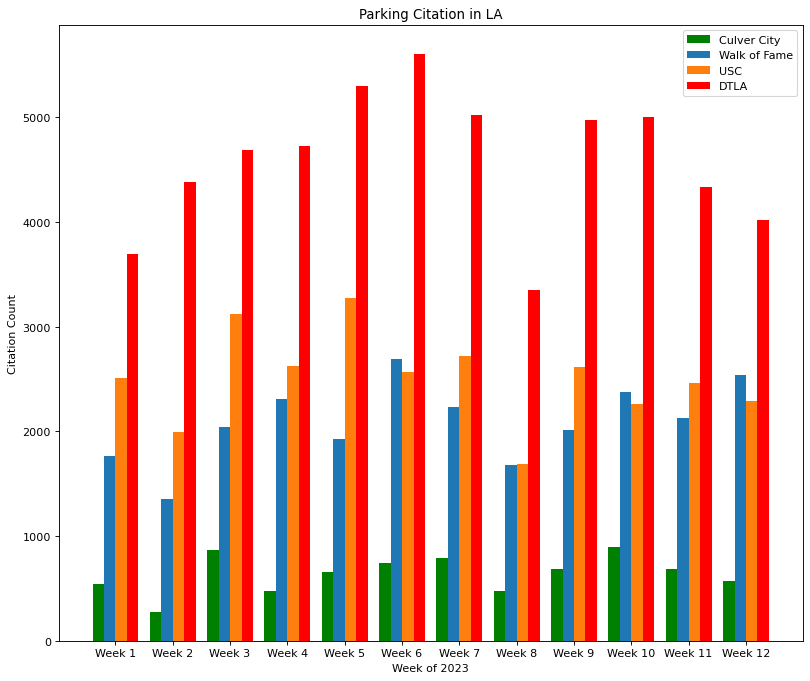

In [39]:
plt.figure(figsize=(12, 10), dpi=80)

X_axis = np.arange(len(Week_list))

plt.bar(X_axis - 0.3, location_compare['Culver City'], 0.2, label = 'Culver City', color='g')
plt.bar(X_axis - 0.1, location_compare['Walk of Fame'], 0.2, label = 'Walk of Fame')
plt.bar(X_axis + 0.1, location_compare['USC'], 0.2, label = 'USC')
plt.bar(X_axis + 0.3, location_compare['DTLA'], 0.2, label = 'DTLA', color='r')
# plt.bar(X_axis + 0.2, location_compare['Long Beach'], 0.2, label = 'Long Beach')
# plt.bar(X_axis + 0.4, location_compare['Santa Monica'], 0.2, label = 'Santa Monica')

plt.xticks(X_axis, Week_list)
plt.xlabel("Week of 2023")
plt.ylabel("Citation Count")
plt.title("Parking Citation in LA")
plt.legend()
plt.show()

## USC

In [40]:
citation_USC.dtypes

week                                  int64
PARKING PROHIBITED OR LIMITED       float64
PARKED IN BUS LOADING ZONE          float64
PUBLIC GROUNDS                      float64
BICYCLE PARKING                     float64
                                     ...   
TIME LIMIT/CITY LOT                 float64
ELECTRIC CHARGING STATION SPACES    float64
METER EXPIRED                       float64
All Violation                       float64
location                             object
Length: 93, dtype: object

In [41]:
citation_USC.drop(['All Violation', 'location'], axis=1, inplace=True)

In [42]:
citation_USC = citation_USC.loc[:, (citation_USC != 0.0).any(axis=0)]
# display(citation_USC)

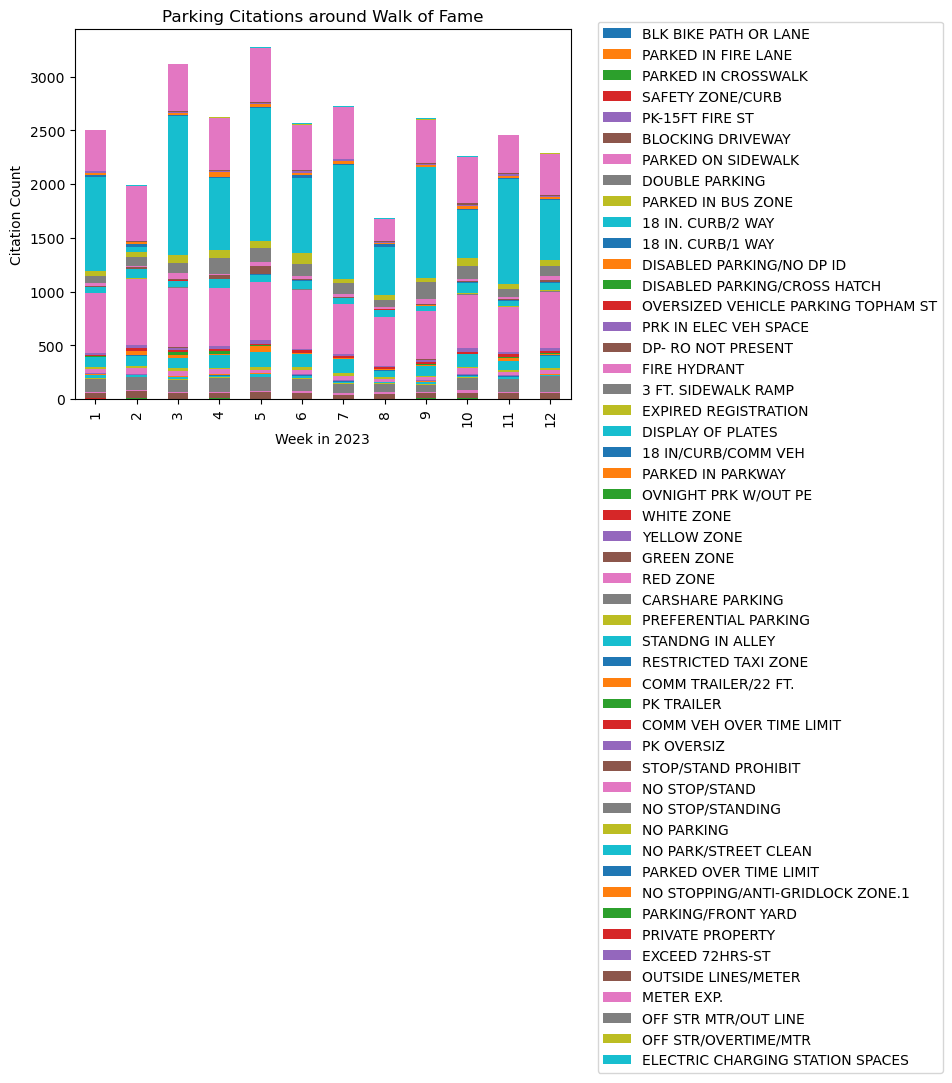

In [43]:
citation_USC.plot(x='week', kind='bar', stacked=True, title='Parking Citations around Walk of Fame')
plt.xlabel("Week in 2023")
plt.ylabel("Citation Count")
plt.legend(bbox_to_anchor=(1.04, 1.04))

plt.show()

In [44]:
# Get top 10 citation columns
s = citation_USC.sum().sort_values(ascending=False, inplace=False)[:6]
# print(s.index)
# Reorder the df
citation_USC_reorder = citation_USC.loc[:, s.index]
citation_USC_reorder = citation_USC_reorder.join(citation_USC['week'])
display(citation_USC_reorder)

,NO PARK/STREET CLEAN,RED ZONE,METER EXP.,DOUBLE PARKING,DISPLAY OF PLATES,NO STOP/STANDING,week
13,873.0,556.0,375.0,119.0,90.0,67.0,1
14,51.0,617.0,508.0,113.0,97.0,81.0,2
15,1290.0,553.0,434.0,106.0,100.0,95.0,3
16,674.0,543.0,481.0,124.0,118.0,145.0,4
17,1240.0,539.0,502.0,122.0,145.0,126.0,5
18,700.0,550.0,423.0,114.0,122.0,108.0,6
19,1058.0,469.0,478.0,87.0,130.0,103.0,7
20,448.0,453.0,213.0,77.0,62.0,66.0,8
21,1033.0,446.0,402.0,66.0,94.0,160.0,9
22,447.0,495.0,426.0,112.0,114.0,118.0,10


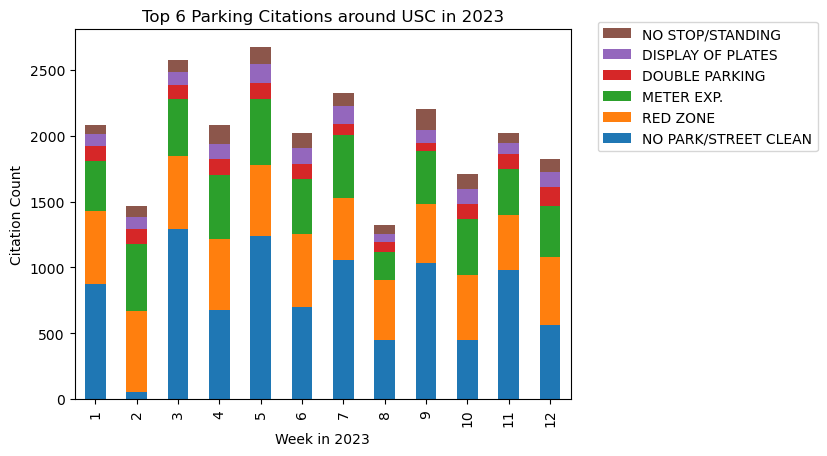

In [45]:
ax = citation_USC_reorder.plot(x='week', kind='bar', stacked=True, title='Top 6 Parking Citations around USC in 2023')
plt.xlabel("Week in 2023")
plt.ylabel("Citation Count")
handles, labels = ax.get_legend_handles_labels()
# Reverse Legend order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1.04))
# plt.legend(bbox_to_anchor=(1.04, 1.04))

plt.show()

In [46]:
# Take closer look at week 5
citation_USC_week2 = citation_USC[citation_USC['week']==3]
# Drop column week
citation_USC_week2.drop(['week'], axis=1, inplace=True)
display(citation_USC_week2)

C:\Users\cheny\AppData\Local\Temp\ipykernel_5248\1715784725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citation_USC_week2.drop(['week'], axis=1, inplace=True)


,BLK BIKE PATH OR LANE,PARKED IN FIRE LANE,PARKED IN CROSSWALK,SAFETY ZONE/CURB,PK-15FT FIRE ST,BLOCKING DRIVEWAY,PARKED ON SIDEWALK,DOUBLE PARKING,PARKED IN BUS ZONE,18 IN. CURB/2 WAY,...,PARKED OVER TIME LIMIT,NO STOPPING/ANTI-GRIDLOCK ZONE.1,PARKING/FRONT YARD,PRIVATE PROPERTY,EXCEED 72HRS-ST,OUTSIDE LINES/METER,METER EXP.,OFF STR MTR/OUT LINE,OFF STR/OVERTIME/MTR,ELECTRIC CHARGING STATION SPACES
15,1.0,0.0,2.0,0.0,0.0,51.0,14.0,106.0,10.0,19.0,...,9.0,16.0,1.0,0.0,13.0,9.0,434.0,0.0,0.0,5.0


In [47]:
# Tranform into dictionary
citation_USC_dict = citation_USC_week2.to_dict('list')
# Sort based on values
citation_USC = sorted(citation_USC_dict.items(), key=lambda x: x[1], reverse=True)
print(citation_USC)

[('NO PARK/STREET CLEAN', [1290.0]), ('RED ZONE', [553.0]), ('METER EXP.', [434.0]), ('DOUBLE PARKING', [106.0]), ('DISPLAY OF PLATES', [100.0]), ('NO STOP/STANDING', [95.0]), ('NO PARKING', [75.0]), ('STANDNG IN ALLEY', [61.0]), ('NO STOP/STAND', [59.0]), ('BLOCKING DRIVEWAY', [51.0]), ('FIRE HYDRANT', [47.0]), ('OVNIGHT PRK W/OUT PE', [31.0]), ('YELLOW ZONE', [24.0]), ('EXPIRED REGISTRATION', [22.0]), ('PARKED IN PARKWAY', [22.0]), ('18 IN. CURB/2 WAY', [19.0]), ('WHITE ZONE', [17.0]), ('NO STOPPING/ANTI-GRIDLOCK ZONE.1', [16.0]), ('PARKED ON SIDEWALK', [14.0]), ('EXCEED 72HRS-ST', [13.0]), ('STOP/STAND PROHIBIT', [11.0]), ('PARKED IN BUS ZONE', [10.0]), ('PARKED OVER TIME LIMIT', [9.0]), ('OUTSIDE LINES/METER', [9.0]), ('DISABLED PARKING/NO DP ID', [8.0]), ('ELECTRIC CHARGING STATION SPACES', [5.0]), ('PRK IN ELEC VEH SPACE', [4.0]), ('GREEN ZONE', [3.0]), ('CARSHARE PARKING', [3.0]), ('RESTRICTED TAXI ZONE', [3.0]), ('PARKED IN CROSSWALK', [2.0]), ('BLK BIKE PATH OR LANE', [1.0]), 

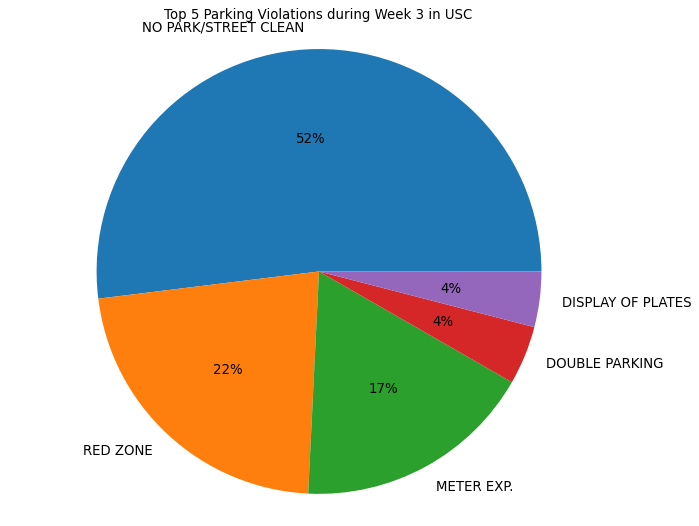

In [48]:
labels = list()
count = list()
for item in citation_USC:
    labels.append(item[0])
    count.append(item[1])

# Plot top 10
labels = labels[:5]
count = count[:5]
# Flatten the list
count = [item for sublist in count for item in sublist]

# Plot
plt.figure(figsize=(10, 8), dpi=80)
plt.pie(count, labels=labels, autopct='%1.0f%%',textprops={'fontsize': 12})
plt.title('Top 5 Parking Violations during Week 3 in USC')
plt.axis('equal')
plt.show()

## DTLA

In [49]:
citation_DTLA.drop(['All Violation', 'location'], axis=1, inplace=True)

In [50]:
citation_DTLA = citation_DTLA.loc[:, (citation_DTLA != 0.0).any(axis=0)]

In [51]:
# Get top 10 citation columns
s = citation_DTLA.sum().sort_values(ascending=False, inplace=False)[:10]
# print(s.index)
# Reorder the df
citation_DTLA_reorder = citation_DTLA.loc[:, s.index]
citation_DTLA_reorder = citation_DTLA_reorder.join(citation_DTLA['week'])
display(citation_DTLA_reorder)

,METER EXP.,RED ZONE,NO STOP/STANDING,NO PARK/STREET CLEAN,NO PARKING,DISPLAY OF PLATES,STANDNG IN ALLEY,YELLOW ZONE,DOUBLE PARKING,STOP/STAND PROHIBIT,week
65,1012.0,784.0,244.0,311.0,199.0,167.0,151.0,122.0,96.0,79.0,1
66,1247.0,934.0,395.0,30.0,324.0,247.0,142.0,126.0,132.0,85.0,2
67,1322.0,942.0,333.0,420.0,292.0,231.0,117.0,129.0,115.0,105.0,3
68,1287.0,1003.0,390.0,298.0,292.0,260.0,163.0,164.0,106.0,127.0,4
69,1478.0,1102.0,454.0,296.0,323.0,294.0,162.0,154.0,97.0,165.0,5
70,1328.0,1239.0,333.0,555.0,370.0,298.0,131.0,113.0,147.0,156.0,6
71,1341.0,1079.0,320.0,310.0,299.0,266.0,147.0,143.0,191.0,137.0,7
72,736.0,733.0,196.0,405.0,233.0,167.0,121.0,62.0,72.0,80.0,8
73,1291.0,1026.0,422.0,309.0,320.0,278.0,168.0,129.0,105.0,99.0,9
74,1246.0,1054.0,381.0,501.0,286.0,264.0,137.0,166.0,127.0,100.0,10


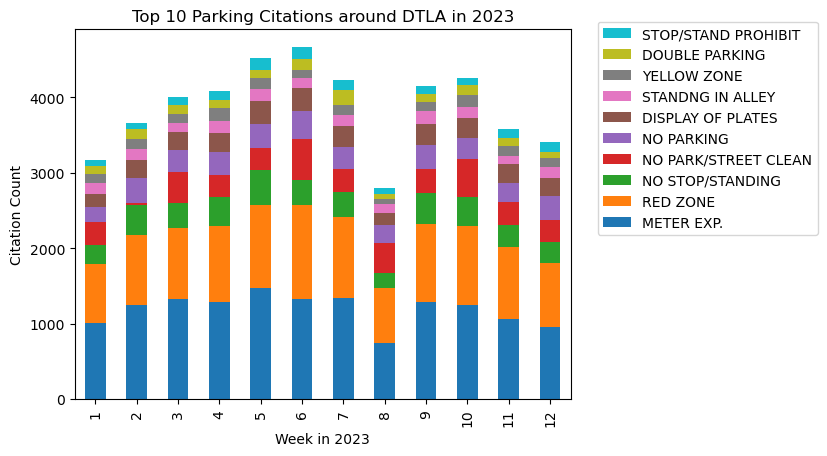

In [52]:
ax = citation_DTLA_reorder.plot(x='week', kind='bar', stacked=True, title='Top 10 Parking Citations around DTLA in 2023')
plt.xlabel("Week in 2023")
plt.ylabel("Citation Count")
handles, labels = ax.get_legend_handles_labels()
# Reverse Legend order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1.04))
# plt.legend(bbox_to_anchor=(1.04, 1.04))

plt.show()

In [53]:
# Take closer look at week 6
citation_DTLA_week2 = citation_DTLA[citation_DTLA['week']==6]
# Drop column week
citation_DTLA_week2.drop(['week'], axis=1, inplace=True)
display(citation_DTLA_week2)

C:\Users\cheny\AppData\Local\Temp\ipykernel_5248\2370602059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citation_DTLA_week2.drop(['week'], axis=1, inplace=True)


,BLK BIKE PATH OR LANE,PARKED IN FIRE LANE,WITHIN INTERSECTION,PARKED IN CROSSWALK,SAFETY ZONE/CURB,PK-15FT FIRE ST,BLOCKING DRIVEWAY,PARKED ON SIDEWALK,DOUBLE PARKING,PARKED IN BUS ZONE,...,NO STOPPING/ANTI-GRIDLOCK ZONE.1,PRIVATE PROPERTY,RED FLAG DAY,EXCEED 72HRS-ST,AUDIBLE ALARM,OUTSIDE LINES/METER,METER EXP.,OFF STR MTR/OUT LINE,OFF STR/OVERTIME/MTR,ELECTRIC CHARGING STATION SPACES
70,11.0,9.0,2.0,17.0,5.0,1.0,40.0,27.0,147.0,28.0,...,47.0,16.0,0.0,15.0,0.0,27.0,1328.0,0.0,17.0,45.0


In [54]:
# Tranform into dictionary
citation_DTLA_dict = citation_DTLA_week2.to_dict('list')
# Sort based on values
citation_DTLA = sorted(citation_DTLA_dict.items(), key=lambda x: x[1], reverse=True)
print(citation_DTLA)

[('METER EXP.', [1328.0]), ('RED ZONE', [1239.0]), ('NO PARK/STREET CLEAN', [555.0]), ('NO PARKING', [370.0]), ('NO STOP/STANDING', [333.0]), ('DISPLAY OF PLATES', [298.0]), ('STOP/STAND PROHIBIT', [156.0]), ('DOUBLE PARKING', [147.0]), ('WHITE ZONE', [146.0]), ('STANDNG IN ALLEY', [131.0]), ('YELLOW ZONE', [113.0]), ('FIRE HYDRANT', [95.0]), ('NO STOP/STAND', [89.0]), ('PARKED OVER TIME LIMIT', [73.0]), ('18 IN. CURB/2 WAY', [52.0]), ('PREFERENTIAL PARKING', [51.0]), ('NO STOPPING/ANTI-GRIDLOCK ZONE.1', [47.0]), ('ELECTRIC CHARGING STATION SPACES', [45.0]), ('BLOCKING DRIVEWAY', [40.0]), ('PARKED IN BUS ZONE', [28.0]), ('PARKED ON SIDEWALK', [27.0]), ('OUTSIDE LINES/METER', [27.0]), ('PRK IN ELEC VEH SPACE', [24.0]), ('RESTRICTED TAXI ZONE', [22.0]), ('EXPIRED REGISTRATION', [21.0]), ('PARKED IN CROSSWALK', [17.0]), ('OFF STR/OVERTIME/MTR', [17.0]), ('PRIVATE PROPERTY', [16.0]), ('EXCEED 72HRS-ST', [15.0]), ('DISABLED PARKING/NO DP ID', [14.0]), ('BLK BIKE PATH OR LANE', [11.0]), ('PA

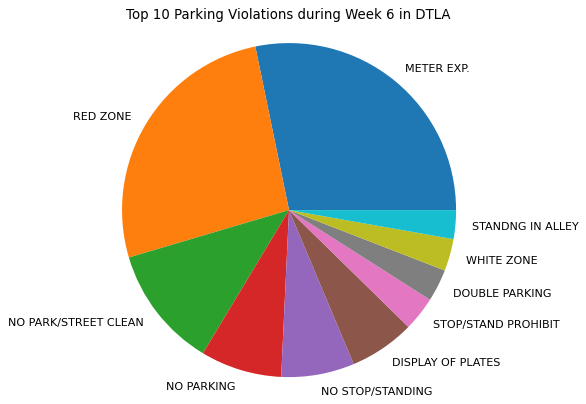

In [55]:
labels = list()
count = list()
for item in citation_DTLA:
    labels.append(item[0])
    count.append(item[1])

# Plot top 10
labels = labels[:10]
count = count[:10]
# Flatten the list
count = [item for sublist in count for item in sublist]

# Plot
plt.figure(figsize=(8, 6), dpi=80)
plt.pie(count, labels=labels)
plt.title('Top 10 Parking Violations during Week 6 in DTLA')
plt.axis('equal')
plt.show()